# Lab 1.01 - Australian Athletes (ais)

In the Python cell below this one, paste all the imports you need for data analysis from the code examples (Numpy, Pandas, etc.).

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns

Declare a variable `ais` and use it to import the dataset from the CSV-file `ais.csv` in [the directory `data/`](https://github.com/HoGentTIN/dsai-en-labs/tree/main/data) of the [Github repository](https://github.com/HoGentTIN/dsai-en-labs/) for the lab assignments. You can import a dataset with a URL pointing to the raw contents of the CSV-file in the Github repository (see the code example!).

This dataset contains 202 observations of Australian athletes with a variety of blood values. You can find the codebook (i.e., the explanation of what each variable/column in the dataset means) in [data/ais.md](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/ais.md). Show the first few observations of this sample.

Get general information about this dataset:

- How many rows and columns does the dataset have?
- Show general information about each variable, specifically the number of empty fields and the type of each variable (e.g., int64, float64, object)
- How many columns of each type are there?
- What is the measurement level (nominal, ordinal, interval, ratio) of each variable?

In [2]:
ais = pd.read_csv('../data/ais.csv')
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [3]:
print(f"Number of rows: {len(ais)}")
print(f"Number of columns: {len(ais.columns)}")
ais.info()
print("+"*50)
print(ais.dtypes.value_counts())
print("+"*50)

Number of rows: 202
Number of columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      202 non-null    int64  
 1   rcc     202 non-null    float64
 2   wcc     202 non-null    float64
 3   hc      202 non-null    float64
 4   hg      202 non-null    float64
 5   ferr    202 non-null    int64  
 6   bmi     202 non-null    float64
 7   ssf     202 non-null    float64
 8   pcBfat  202 non-null    float64
 9   lbm     202 non-null    float64
 10  ht      202 non-null    float64
 11  wt      202 non-null    float64
 12  sex     202 non-null    object 
 13  sport   202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB
++++++++++++++++++++++++++++++++++++++++++++++++++
float64    10
int64       2
object      2
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++


The column "id" is not an actual variable, but an index. Mark it as such.

In [4]:
ais.set_index(['id'])

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis


The variables that are now considered "object" are qualitative variables. Change the type of each of these variables to "category". For ordinal variables, also define a type and impose an order. Verify that the conversion was successful by requesting info about the types again.

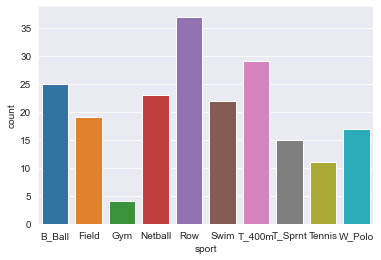

In [5]:
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')
sport_type = CategoricalDtype(categories=['B_Ball', 'Field', 'Gym', 'Netball', 'Row', 'Swim', 'T_400m', 'T_Sprnt', 'Tennis', 'W_Polo'], ordered=True)
ais.sport = ais.sport.astype(sport_type)
ais.sport.describe()
sns.countplot(data=ais, x='sport');

Describe the columns `ferr`, `bmi`, `sex` and `sport` and the unique values in each of these columns. Do you recognize the characteristics of qualitative and quantitative variables in the result?

In [6]:
print(ais.ferr.describe())
print("+"*50)
print(ais.bmi.describe())
print("+"*50)
print(ais.sex.describe())
print(ais.sex.unique())
print("+"*50)
print(ais.sport.describe())
print(ais.sport.unique())

count    202.000000
mean      76.876238
std       47.501239
min        8.000000
25%       41.250000
50%       65.500000
75%       97.000000
max      234.000000
Name: ferr, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++
count    202.000000
mean      22.955891
std        2.863933
min       16.750000
25%       21.082500
50%       22.720000
75%       24.465000
max       34.420000
Name: bmi, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++
count     202
unique      2
top         m
freq      102
Name: sex, dtype: object
['f', 'm']
Categories (2, object): ['f', 'm']
++++++++++++++++++++++++++++++++++++++++++++++++++
count     202
unique     10
top       Row
freq       37
Name: sport, dtype: object
['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt', 'Tennis', 'Gym', 'W_Polo']
Categories (10, object): ['B_Ball' < 'Field' < 'Gym' < 'Netball' ... 'T_400m' < 'T_Sprnt' < 'Tennis' < 'W_Polo']


Select following elements from the dataset:

- the second row (ids = 2)
- rows 4 to 6 (ids = 5 to 7)
- Columns 6 to 8 (`ferr`, `bmi`, `ssf`)
- the variable `pcBfat` (by name!). There are multiple ways to retrieve this!
- all observations for the sport "Netball"
- just the variable `wt` of the observations for "Netball"
- which sports are played by athletes with a BMI higher than 26? Also, provide a list of the unique values and a frequency table of how often each sport occurs.

In [7]:
print(ais.iloc[2])
print(ais.iloc[5:7])
#ais[['ferr','bmi','ssf']]
print(ais.iloc[:, 6:8])
print(ais[['pcBfat']])
print(ais.query("sport == 'Netball'"))
print(ais.query("sport == 'Netball'")[['wt']])
print(ais[ais.bmi < 26][['sport']])
all_sport = ais[ais.bmi < 26][['sport']]
print(all_sport.drop_duplicates())
sport_type = CategoricalDtype(categories=['B_Ball', 'Field', 'Gym', 'Netball', 'Row', 'Swim', 'T_400m', 'T_Sprnt', 'Tennis', 'W_Polo'], ordered=True)
ais.sport = ais.sport.astype(sport_type)

id             3
rcc         4.14
wcc          5.0
hc          36.4
hg          11.6
ferr          21
bmi        21.86
ssf        104.6
pcBfat     19.88
lbm        55.36
ht         177.8
wt          69.1
sex            f
sport     B_Ball
Name: 2, dtype: object
   id   rcc  wcc    hc    hg  ferr    bmi   ssf  pcBfat    lbm     ht    wt  \
5   6  4.10  4.4  37.4  12.5    42  21.04  75.2   15.58  53.77  174.0  63.7   
6   7  4.31  5.3  39.6  12.8    73  21.69  87.2   19.99  60.17  186.2  75.2   

  sex   sport  
5   f  B_Ball  
6   f  B_Ball  
       bmi    ssf
0    20.56  109.1
1    20.67  102.8
2    21.86  104.6
3    21.88  126.4
4    18.96   80.3
..     ...    ...
197  27.56   67.2
198  23.76   56.5
199  22.01   47.6
200  22.34   60.4
201  21.07   34.9

[202 rows x 2 columns]
     pcBfat
0     19.75
1     21.30
2     19.88
3     23.66
4     17.64
..      ...
197   11.79
198   10.05
199    8.51
200   11.50
201    6.26

[202 rows x 1 columns]
    id   rcc   wcc    hc    hg  ferr    bmi  

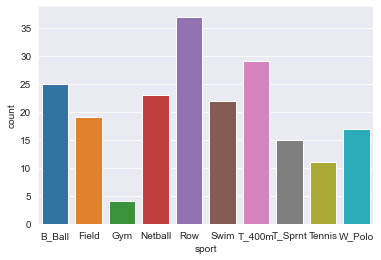

In [8]:
import seaborn as sns
sns.countplot(data=ais, x='sport');